# Analyzing Economic Data Using Fred API

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.style as style
style.use('fivethirtyeight')
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred
fred_key = 'c95abd581e2fff35cbfb36084de91357'

### Create the Fred Object

In [44]:
fred = Fred(api_key=fred_key)
fred

### Search for Economic Data

In [45]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search.head()

id realtime_start realtime_end   
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-04-09   2023-04-09  \
CSUSHPINSA          CSUSHPINSA     2023-04-09   2023-04-09   
SP500                    SP500     2023-04-09   2023-04-09   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-04-09   2023-04-09   
CSUSHPISA            CSUSHPISA     2023-04-09   2023-04-09   

                                                            title   
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...  \
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
SP500                                                     S&P 500   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
CSUSHPISA         S&P/Case-Shiller U.S. National Home Price Index   

               observation_start observation_end     frequency   
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-04-05  Daily, Close  \
CSUSHPINSA            1987-01-01      2023-01-01       Monthly   
SP500                 2013-04-08      2023-04-06  Daily, Close   
BAMLH0A0HYM2EY        1996-12-31      2023-04-05  Daily, Close   
CSUSHPISA             1987-01-01      2023-01-01       Monthly   

               frequency_short               units         units_short   
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %  \
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
SP500                        D               Index               Index   
BAMLH0A0HYM2EY               D             Percent                   %   
CSUSHPISA                    M  Index Jan 2000=100  Index Jan 2000=100   

                    seasonal_adjustment seasonal_adjustment_short   
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA  \
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
CSUSHPISA           Seasonally Adjusted                        SA   

                             last_updated popularity   
series id                                              
BAMLH0A0HYM2    2023-04-06 09:01:02-05:00         95  \
CSUSHPINSA      2023-03-30 10:39:01-05:00         91   
SP500           2023-04-06 19:10:50-05:00         84   
BAMLH0A0HYM2EY  2023-04-06 09:01:06-05:00         84   
CSUSHPISA       2023-03-30 10:39:01-05:00         81   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA      For more information regarding the index, plea...  
SP500           The observations for the S&P 500 represent the...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
CSUSHPISA       For more information regarding the index, plea...

### Pull Economic Data From a Series ID

In [46]:
sp500 = fred.get_series(series_id='SP500')
sp500.head()

2013-04-08    1563.07
2013-04-09    1568.61
2013-04-10    1587.73
2013-04-11    1593.37
2013-04-12    1588.85
dtype: float64

<Axes: title={'center': 'S&P 500'}>

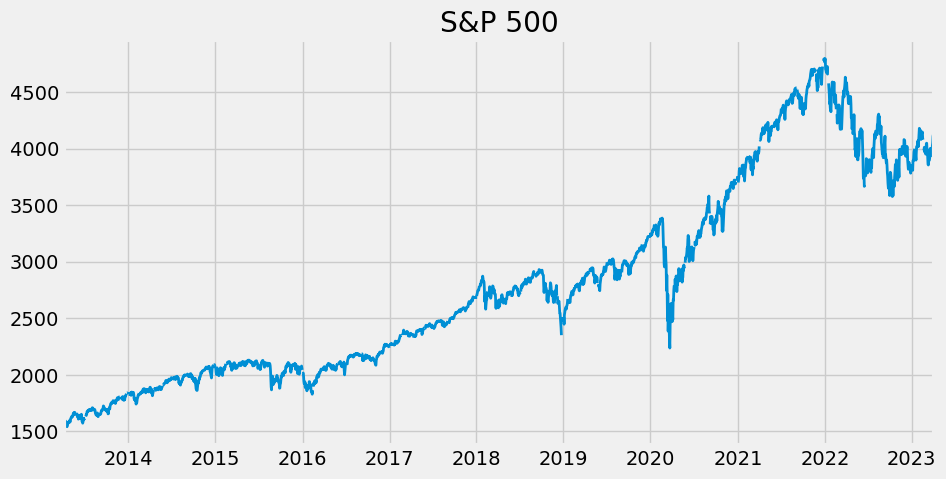

In [47]:
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)

### Pull and Join Multiple Data Series

In [48]:
unemp_results = fred.search('unemployment')
unemp_results.head()

id realtime_start realtime_end   
series id                                          
UNRATE        UNRATE     2023-04-09   2023-04-09  \
UNRATENSA  UNRATENSA     2023-04-09   2023-04-09   
NROU            NROU     2023-04-09   2023-04-09   
UNEMPLOY    UNEMPLOY     2023-04-09   2023-04-09   
CCSA            CCSA     2023-04-09   2023-04-09   

                                             title observation_start   
series id                                                              
UNRATE                           Unemployment Rate        1948-01-01  \
UNRATENSA                        Unemployment Rate        1948-01-01   
NROU              Noncyclical Rate of Unemployment        1949-01-01   
UNEMPLOY                        Unemployment Level        1948-01-01   
CCSA       Continued Claims (Insured Unemployment)        1967-01-07   

          observation_end                frequency frequency_short   
series id                                                            
UNRATE         2023-03-01                  Monthly               M  \
UNRATENSA      2023-03-01                  Monthly               M   
NROU           2033-10-01                Quarterly               Q   
UNEMPLOY       2023-03-01                  Monthly               M   
CCSA           2023-03-25  Weekly, Ending Saturday               W   

                          units        units_short      seasonal_adjustment   
series id                                                                     
UNRATE                  Percent                  %      Seasonally Adjusted  \
UNRATENSA               Percent                  %  Not Seasonally Adjusted   
NROU                    Percent                  %  Not Seasonally Adjusted   
UNEMPLOY   Thousands of Persons  Thous. of Persons      Seasonally Adjusted   
CCSA                     Number             Number      Seasonally Adjusted   

          seasonal_adjustment_short               last_updated popularity   
series id                                                                   
UNRATE                           SA  2023-04-07 07:44:02-05:00         94  \
UNRATENSA                       NSA  2023-04-07 07:43:02-05:00         59   
NROU                            NSA  2023-03-21 15:19:03-05:00         68   
UNEMPLOY                         SA  2023-04-07 07:44:04-05:00         69   
CCSA                             SA  2023-04-06 09:30:06-05:00         73   

                                                       notes  
series id                                                     
UNRATE     The unemployment rate represents the number of...  
UNRATENSA  The unemployment rate represents the number of...  
NROU       Starting with the July, 2021 report: An Update...  
UNEMPLOY   The series comes from the 'Current Population ...  
CCSA       Continued claims, also referred to as insured ...

In [49]:
unrate = fred.get_series(series_id='UNRATE')
unrate.head()

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

<Axes: >

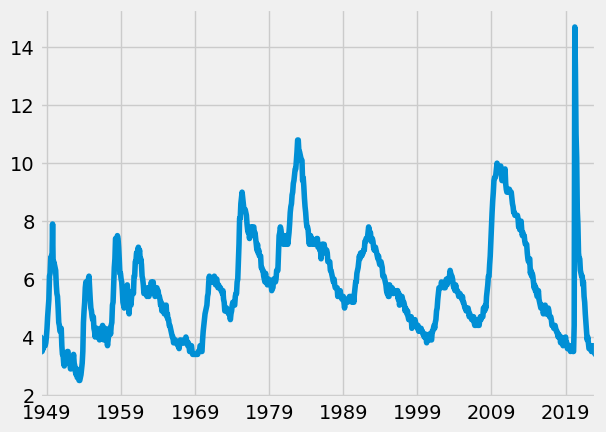

In [50]:
unrate.plot()

**Create dataframe with only Seasonally Adjusted Unemployment Data**

In [51]:
unemp_df = fred.search(text='unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df

id realtime_start realtime_end   
series id                                                                
UNRATE                              UNRATE     2023-04-09   2023-04-09  \
UNRATENSA                        UNRATENSA     2023-04-09   2023-04-09   
UNEMPLOY                          UNEMPLOY     2023-04-09   2023-04-09   
LNS14000006                    LNS14000006     2023-04-09   2023-04-09   
U6RATE                              U6RATE     2023-04-09   2023-04-09   
LNU04000006                    LNU04000006     2023-04-09   2023-04-09   
U6RATENSA                        U6RATENSA     2023-04-09   2023-04-09   
CAUR                                  CAUR     2023-04-09   2023-04-09   
M0892AUSM156SNBR          M0892AUSM156SNBR     2023-04-09   2023-04-09   
M0892BUSM156SNBR          M0892BUSM156SNBR     2023-04-09   2023-04-09   
CAURN                                CAURN     2023-04-09   2023-04-09   
M0892CUSM156NNBR          M0892CUSM156NNBR     2023-04-09   2023-04-09   
U2RATE                              U2RATE     2023-04-09   2023-04-09   
FLUR                                  FLUR     2023-04-09   2023-04-09   
LNS14000002                    LNS14000002     2023-04-09   2023-04-09   
TXUR                                  TXUR     2023-04-09   2023-04-09   
LNS14000031                    LNS14000031     2023-04-09   2023-04-09   
NYUR                                  NYUR     2023-04-09   2023-04-09   
TXURN                                TXURN     2023-04-09   2023-04-09   
FLURN                                FLURN     2023-04-09   2023-04-09   
U2RATENSA                        U2RATENSA     2023-04-09   2023-04-09   
LNU04000002                    LNU04000002     2023-04-09   2023-04-09   
UEMPMEAN                          UEMPMEAN     2023-04-09   2023-04-09   
NYURN                                NYURN     2023-04-09   2023-04-09   
LNS14000024                    LNS14000024     2023-04-09   2023-04-09   
LNU04000031                    LNU04000031     2023-04-09   2023-04-09   
LNS14000009                    LNS14000009     2023-04-09   2023-04-09   
LNU04000024                    LNU04000024     2023-04-09   2023-04-09   
LNS14027662                    LNS14027662     2023-04-09   2023-04-09   
UEMP27OV                          UEMP27OV     2023-04-09   2023-04-09   
LNU04000009                    LNU04000009     2023-04-09   2023-04-09   
LNU04027662                    LNU04027662     2023-04-09   2023-04-09   
CALOSA7URN                      CALOSA7URN     2023-04-09   2023-04-09   
LNU04032231                    LNU04032231     2023-04-09   2023-04-09   
CGBD2534                          CGBD2534     2023-04-09   2023-04-09   
LNS14000003                    LNS14000003     2023-04-09   2023-04-09   
LNS14027660                    LNS14027660     2023-04-09   2023-04-09   
LNU04027660                    LNU04027660     2023-04-09   2023-04-09   
LNU04000003                    LNU04000003     2023-04-09   2023-04-09   
PAUR                                  PAUR     2023-04-09   2023-04-09   
U4RATE                              U4RATE     2023-04-09   2023-04-09   
LRUN64TTUSM156S            LRUN64TTUSM156S     2023-04-09   2023-04-09   
LRUN64TTUSM156N            LRUN64TTUSM156N     2023-04-09   2023-04-09   
LNS14000001                    LNS14000001     2023-04-09   2023-04-09   
U4RATENSA                        U4RATENSA     2023-04-09   2023-04-09   
PAURN                                PAURN     2023-04-09   2023-04-09   
OHUR                                  OHUR     2023-04-09   2023-04-09   
ALUR                                  ALUR     2023-04-09   2023-04-09   
MIUR                                  MIUR     2023-04-09   2023-04-09   
LNU04000001                    LNU04000001     2023-04-09   2023-04-09   
MIURN                                MIURN     2023-04-09   2023-04-09   
MNUR                                  MNUR     2023-04-09   2023-04-09   
ILURN                                ILURN  

In [52]:
unemp_df = unemp_df.query('seasonal_adjustment == \'Seasonally Adjusted\' and units == \'Percent\'')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df

id realtime_start realtime_end   
series id                                                                
UNRATE                              UNRATE     2023-04-09   2023-04-09  \
LNS14000006                    LNS14000006     2023-04-09   2023-04-09   
CAUR                                  CAUR     2023-04-09   2023-04-09   
M0892AUSM156SNBR          M0892AUSM156SNBR     2023-04-09   2023-04-09   
M0892BUSM156SNBR          M0892BUSM156SNBR     2023-04-09   2023-04-09   
U2RATE                              U2RATE     2023-04-09   2023-04-09   
FLUR                                  FLUR     2023-04-09   2023-04-09   
LNS14000002                    LNS14000002     2023-04-09   2023-04-09   
TXUR                                  TXUR     2023-04-09   2023-04-09   
LNS14000031                    LNS14000031     2023-04-09   2023-04-09   
NYUR                                  NYUR     2023-04-09   2023-04-09   
LNS14000024                    LNS14000024     2023-04-09   2023-04-09   
LNS14000009                    LNS14000009     2023-04-09   2023-04-09   
LNS14027662                    LNS14027662     2023-04-09   2023-04-09   
LNS14000003                    LNS14000003     2023-04-09   2023-04-09   
LNS14027660                    LNS14027660     2023-04-09   2023-04-09   
PAUR                                  PAUR     2023-04-09   2023-04-09   
LRUN64TTUSM156S            LRUN64TTUSM156S     2023-04-09   2023-04-09   
LNS14000001                    LNS14000001     2023-04-09   2023-04-09   
OHUR                                  OHUR     2023-04-09   2023-04-09   
ALUR                                  ALUR     2023-04-09   2023-04-09   
MIUR                                  MIUR     2023-04-09   2023-04-09   
MNUR                                  MNUR     2023-04-09   2023-04-09   
ILUR                                  ILUR     2023-04-09   2023-04-09   
NCUR                                  NCUR     2023-04-09   2023-04-09   
NJUR                                  NJUR     2023-04-09   2023-04-09   
MAUR                                  MAUR     2023-04-09   2023-04-09   
LNS14032183                    LNS14032183     2023-04-09   2023-04-09   
WIUR                                  WIUR     2023-04-09   2023-04-09   
WAUR                                  WAUR     2023-04-09   2023-04-09   
KYUR                                  KYUR     2023-04-09   2023-04-09   
TNUR                                  TNUR     2023-04-09   2023-04-09   
LNS14027659                    LNS14027659     2023-04-09   2023-04-09   
GAUR                                  GAUR     2023-04-09   2023-04-09   
VAUR                                  VAUR     2023-04-09   2023-04-09   
LNS14000018                    LNS14000018     2023-04-09   2023-04-09   
COUR                                  COUR     2023-04-09   2023-04-09   
MOUR                                  MOUR     2023-04-09   2023-04-09   
WVUR                                  WVUR     2023-04-09   2023-04-09   
NMUR                                  NMUR     2023-04-09   2023-04-09   
AKUR                                  AKUR     2023-04-09   2023-04-09   
ORUR                                  ORUR     2023-04-09   2023-04-09   
OKUR                                  OKUR     2023-04-09   2023-04-09   
AZUR                                  AZUR     2023-04-09   2023-04-09   
NVUR                                  NVUR     2023-04-09   2023-04-09   
SCUR                                  SCUR     2023-04-09   2023-04-09   
UTUR                                  UTUR     2023-04-09   2023-04-09   
LNS14000012                    LNS14000012     2023-04-09   2023-04-09   
IAUR                                  IAUR     2023-04-09   2023-04-09   
INUR                                  INUR     2023-04-09   2023-04-09   
MDUR                                  MDUR     2023-04-09   2023-04-09   
LAUR                                  LAUR     2023-04-09   2023-04-09   
ARUR                                  ARUR  

Let's remove data from not from State Unemployment rate surveys.

In [53]:
unemp_df.drop(index=unemp_df.loc[unemp_df.index.str.len() > 4].index, inplace=True)
unemp_df

id realtime_start realtime_end   
series id                                     
CAUR       CAUR     2023-04-09   2023-04-09  \
FLUR       FLUR     2023-04-09   2023-04-09   
TXUR       TXUR     2023-04-09   2023-04-09   
NYUR       NYUR     2023-04-09   2023-04-09   
PAUR       PAUR     2023-04-09   2023-04-09   
OHUR       OHUR     2023-04-09   2023-04-09   
ALUR       ALUR     2023-04-09   2023-04-09   
MIUR       MIUR     2023-04-09   2023-04-09   
MNUR       MNUR     2023-04-09   2023-04-09   
ILUR       ILUR     2023-04-09   2023-04-09   
NCUR       NCUR     2023-04-09   2023-04-09   
NJUR       NJUR     2023-04-09   2023-04-09   
MAUR       MAUR     2023-04-09   2023-04-09   
WIUR       WIUR     2023-04-09   2023-04-09   
WAUR       WAUR     2023-04-09   2023-04-09   
KYUR       KYUR     2023-04-09   2023-04-09   
TNUR       TNUR     2023-04-09   2023-04-09   
GAUR       GAUR     2023-04-09   2023-04-09   
VAUR       VAUR     2023-04-09   2023-04-09   
COUR       COUR     2023-04-09   2023-04-09   
MOUR       MOUR     2023-04-09   2023-04-09   
WVUR       WVUR     2023-04-09   2023-04-09   
NMUR       NMUR     2023-04-09   2023-04-09   
AKUR       AKUR     2023-04-09   2023-04-09   
ORUR       ORUR     2023-04-09   2023-04-09   
OKUR       OKUR     2023-04-09   2023-04-09   
AZUR       AZUR     2023-04-09   2023-04-09   
NVUR       NVUR     2023-04-09   2023-04-09   
SCUR       SCUR     2023-04-09   2023-04-09   
UTUR       UTUR     2023-04-09   2023-04-09   
IAUR       IAUR     2023-04-09   2023-04-09   
INUR       INUR     2023-04-09   2023-04-09   
MDUR       MDUR     2023-04-09   2023-04-09   
LAUR       LAUR     2023-04-09   2023-04-09   
ARUR       ARUR     2023-04-09   2023-04-09   
NDUR       NDUR     2023-04-09   2023-04-09   
NEUR       NEUR     2023-04-09   2023-04-09   
KSUR       KSUR     2023-04-09   2023-04-09   
HIUR       HIUR     2023-04-09   2023-04-09   
CTUR       CTUR     2023-04-09   2023-04-09   
PRUR       PRUR     2023-04-09   2023-04-09   
WYUR       WYUR     2023-04-09   2023-04-09   
DCUR       DCUR     2023-04-09   2023-04-09   
IDUR       IDUR     2023-04-09   2023-04-09   
MEUR       MEUR     2023-04-09   2023-04-09   
MSUR       MSUR     2023-04-09   2023-04-09   
SDUR       SDUR     2023-04-09   2023-04-09   
MTUR       MTUR     2023-04-09   2023-04-09   
DEUR       DEUR     2023-04-09   2023-04-09   
NHUR       NHUR     2023-04-09   2023-04-09   
RIUR       RIUR     2023-04-09   2023-04-09   
VTUR       VTUR     2023-04-09   2023-04-09   

                                                   title observation_start   
series id                                                                    
CAUR                     Unemployment Rate in California        1976-01-01  \
FLUR                        Unemployment Rate in Florida        1976-01-01   
TXUR                          Unemployment Rate in Texas        1976-01-01   
NYUR                       Unemployment Rate in New York        1976-01-01   
PAUR                   Unemployment Rate in Pennsylvania        1976-01-01   
OHUR                           Unemployment Rate in Ohio        1976-01-01   
ALUR                        Unemployment Rate in Alabama        1976-01-01   
MIUR                       Unemployment Rate in Michigan        1976-01-01   
MNUR                      Unemployment Rate in Minnesota        1976-01-01   
ILUR                       Unemployment Rate in Illinois        1976-01-01   
NCUR                 Unemployment Rate in North Carolina        1976-01-01   
NJUR                     Unemployment Rate in New Jersey        1976-01-01   
MAUR                  Unemployment Rate in Massachusetts        1976-01-01   
WIUR                      Unemployment Rate in Wisconsin        1976-01-01   
WAUR                     Unemployment Rate in Washington        1976-01-01   
KYUR                       Unemployment Rate in Kentucky        1976-01-01   
TNUR                      Unemployment Rate in Tennessee        1976-0

**Pull Series Data from each Series Id in Unemployment Dataframe**

In [54]:
series_ids = list(unemp_df.index)

all_series = list()
for id in series_ids:
    result = fred.get_series(series_id=id)
    result = result.to_frame(name=id)
    all_series.append(result)

unemp_results = pd.concat(all_series, axis=1).sort_index(axis=1)
unemp_results

AKUR  ALUR  ARUR  AZUR  CAUR  COUR  CTUR  DCUR  DEUR  FLUR  GAUR   
1976-01-01   7.1   6.6   7.3  10.2   9.2   5.8   9.8   8.7   8.0   9.7   8.4  \
1976-02-01   7.1   6.6   7.3  10.2   9.2   5.7   9.8   8.7   8.0   9.7   8.4   
1976-03-01   7.0   6.6   7.3  10.1   9.1   5.7   9.8   8.6   8.0   9.6   8.4   
1976-04-01   6.9   6.5   7.2  10.0   9.1   5.6   9.6   8.5   8.1   9.5   8.3   
1976-05-01   6.9   6.4   7.1   9.8   9.0   5.6   9.4   8.4   8.3   9.3   8.1   
1976-06-01   7.1   6.5   6.9   9.7   9.0   5.6   9.3   8.3   8.6   9.2   8.0   
1976-07-01   7.3   6.6   6.8   9.7   9.0   5.8   9.1   8.4   8.8   9.1   8.0   
1976-08-01   7.6   6.7   6.7   9.6   9.1   5.9   9.0   8.5   8.9   9.1   8.0   
1976-09-01   8.0   6.8   6.6   9.6   9.2   6.1   8.8   8.7   9.0   9.1   8.0   
1976-10-01   8.3   6.9   6.6   9.5   9.3   6.3   8.7   8.8   9.1   9.1   8.1   
1976-11-01   8.6   7.0   6.6   9.4   9.3   6.4   8.5   8.9   9.2   9.1   8.1   
1976-12-01   8.9   7.2   6.6   9.3   9.3   6.5   8.3   8.9   9.2   9.1   8.1   
1977-01-01   9.1   7.3   6.6   9.3   9.2   6.6   8.2   8.9   9.2   9.0   8.1   
1977-02-01   9.4   7.4   6.6   9.2   9.1   6.6   7.9   8.8   9.1   9.0   7.9   
1977-03-01   9.6   7.5   6.6   9.1   8.9   6.6   7.7   8.7   8.9   8.9   7.7   
1977-04-01   9.7   7.5   6.6   9.0   8.7   6.5   7.5   8.7   8.7   8.7   7.4   
1977-05-01   9.9   7.5   6.5   8.8   8.6   6.4   7.2   8.7   8.4   8.6   7.1   
1977-06-01   9.9   7.4   6.4   8.6   8.4   6.3   7.0   8.7   8.2   8.4   6.9   
1977-07-01  10.0   7.3   6.4   8.4   8.3   6.2   6.8   8.7   8.0   8.2   6.7   
1977-08-01  10.0   7.1   6.4   8.2   8.1   6.2   6.7   8.7   7.8   8.1   6.6   
1977-09-01  10.0   6.9   6.4   8.0   8.0   6.2   6.5   8.6   7.7   7.9   6.5   
1977-10-01  10.1   6.8   6.4   7.7   7.9   6.2   6.3   8.5   7.5   7.7   6.3   
1977-11-01  10.4   6.6   6.4   7.4   7.8   6.2   6.1   8.3   7.4   7.5   6.1   
1977-12-01  10.6   6.5   6.4   7.1   7.7   6.2   6.0   8.2   7.3   7.3   5.9   
1978-01-01  10.9   6.4   6.3   6.8   7.6   6.2   5.8   8.1   7.2   7.1   5.7   
1978-02-01  11.0   6.3   6.2   6.5   7.5   6.1   5.6   8.0   7.1   7.0   5.6   
1978-03-01  11.1   6.3   6.2   6.3   7.5   6.0   5.5   8.0   7.1   6.9   5.5   
1978-04-01  11.1   6.2   6.1   6.1   7.4   5.9   5.4   7.9   7.1   6.8   5.6   
1978-05-01  11.0   6.2   6.0   5.9   7.3   5.8   5.3   7.9   7.1   6.8   5.6   
1978-06-01  10.8   6.2   6.1   5.7   7.2   5.6   5.2   7.8   7.1   6.8   5.7   
1978-07-01  10.7   6.3   6.1   5.6   7.1   5.5   5.2   7.7   7.1   6.7   5.8   
1978-08-01  10.6   6.4   6.2   5.6   7.0   5.3   5.1   7.7   7.0   6.7   5.8   
1978-09-01  10.4   6.5   6.3   5.6   6.9   5.2   5.1   7.6   7.0   6.6   5.8   
1978-10-01  10.2   6.6   6.4   5.7   6.8   5.1   5.1   7.6   7.0   6.6   5.8   
1978-11-01  10.0   6.7   6.4   5.8   6.7   5.0   5.1   7.6   7.0   6.6   5.7   
1978-12-01   9.8   6.8   6.4   5.8   6.6   5.0   5.1   7.6   7.1   6.5   5.7   
1979-01-01   9.6   6.9   6.4   5.8   6.5   4.9   5.1   7.6   7.1   6.5   5.6   
1979-02-01   9.4   7.0   6.4   5.6   6.4   4.8   5.2   7.6   7.1   6.4   5.5   
1979-03-01   9.2   7.0   6.3   5.4   6.3   4.7   5.1   7.4   7.1   6.3   5.4   
1979-04-01   9.1   7.1   6.3   5.1   6.2   4.6   5.1   7.2   7.0   6.2   5.2   
1979-05-01   9.0   7.2   6.3   4.9   6.2   4.5   5.1   7.0   7.0   6.0   5.1   
1979-06-01   8.9   7.2   6.3   4.8   6.1   4.5   5.0   6.8   6.9   6.0   5.0   
1979-07-01   9.0   7.3   6.3   4.7   6.1   4.6   5.0   6.6   6.9   5.9   4.9   
1979-08-01   9.0   7.3   6.3   4.7   6.2   4.6   5.0   6.5   6.9   5.8   4.9   
1979-09-01   9.0   7.4   6.3   4.8   6.2   4.7   5.1   6.4   6.9   5.8   4.9   
1979-10-01   9.0   7.4   6.2   4.9   6.2   4.6   5.1   6.4   7.0   5.7   4.9   
1979-11-01   8.8   7.4   6.2   5.0   6.1   4.5   5.1   6.3   6.9   5.7   5.0   
1979-12-01   8.7   7.5   6.1   5.2   6.1   4.4   5.1   6.3   6.9   5.6   5.2   
1980-01-01   8.7   7.6   6.2   5.4   6.2   4.5   5.1   6.4   6.8   5.6   5.4   
1980-02-01  

**Find and Handle Missing Data**

<Axes: >

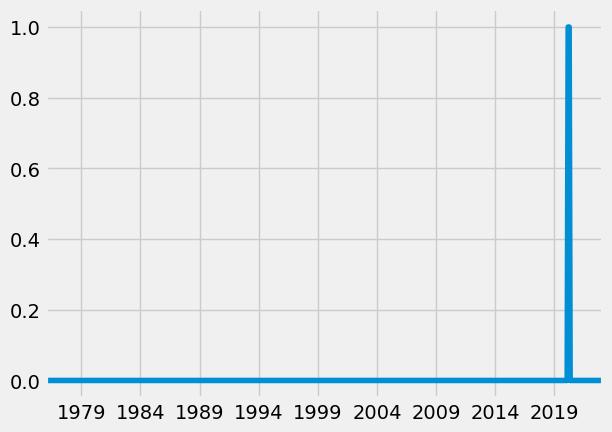

In [55]:
unemp_states = unemp_results.copy()
unemp_states.isna().sum(axis=1).plot()

<Axes: >

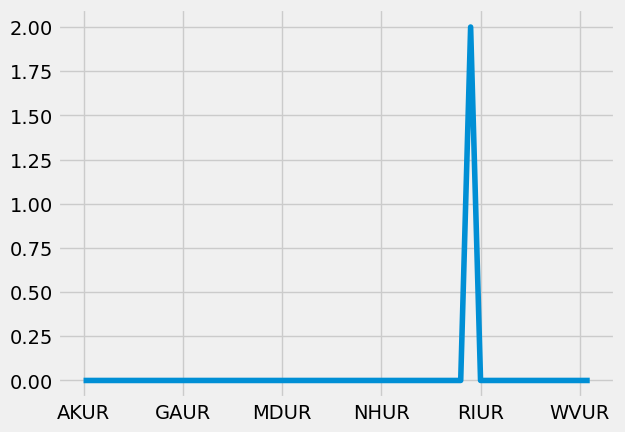

In [56]:
unemp_states.isna().sum(axis=0).plot()

Find the missing data!

In [57]:
unemp_states.isna().sum(axis=1)

1976-01-01    0
1976-02-01    0
1976-03-01    0
1976-04-01    0
1976-05-01    0
1976-06-01    0
1976-07-01    0
1976-08-01    0
1976-09-01    0
1976-10-01    0
1976-11-01    0
1976-12-01    0
1977-01-01    0
1977-02-01    0
1977-03-01    0
1977-04-01    0
1977-05-01    0
1977-06-01    0
1977-07-01    0
1977-08-01    0
1977-09-01    0
1977-10-01    0
1977-11-01    0
1977-12-01    0
1978-01-01    0
1978-02-01    0
1978-03-01    0
1978-04-01    0
1978-05-01    0
1978-06-01    0
1978-07-01    0
1978-08-01    0
1978-09-01    0
1978-10-01    0
1978-11-01    0
1978-12-01    0
1979-01-01    0
1979-02-01    0
1979-03-01    0
1979-04-01    0
1979-05-01    0
1979-06-01    0
1979-07-01    0
1979-08-01    0
1979-09-01    0
1979-10-01    0
1979-11-01    0
1979-12-01    0
1980-01-01    0
1980-02-01    0
1980-03-01    0
1980-04-01    0
1980-05-01    0
1980-06-01    0
1980-07-01    0
1980-08-01    0
1980-09-01    0
1980-10-01    0
1980-11-01    0
1980-12-01    0
1981-01-01    0
1981-02-01    0
1981-03-

In [58]:
unemp_states.loc[unemp_states.isna().any(axis=1)]

AKUR  ALUR  ARUR  AZUR  CAUR  COUR  CTUR  DCUR  DEUR  FLUR  GAUR   
2020-03-01   5.5   3.4   4.9   4.9   5.5   3.3   3.9   5.7   5.0   4.0   3.7  \
2020-04-01  11.8  13.8  10.1  13.8  16.1  11.1   8.2  11.2  13.0  13.3  12.4   

            HIUR  IAUR  IDUR  ILUR  INUR  KSUR  KYUR  LAUR  MAUR  MDUR  MEUR   
2020-03-01   2.2   2.6   2.7   5.0   3.5   3.2   4.1   6.7   2.8   3.5   3.2  \
2020-04-01  22.6  10.9  11.7  18.0  16.8  12.4  16.7  13.5  16.9   9.0   9.3   

            MIUR  MNUR  MOUR  MSUR  MTUR  NCUR  NDUR  NEUR  NHUR  NJUR  NMUR   
2020-03-01   3.7   3.6   3.5   5.9   3.5   4.0   2.4   4.4   2.6   4.1   5.8  \
2020-04-01  22.6   8.8  11.4  15.6  11.9  14.2   8.7   8.1  16.0  14.9   9.0   

            NVUR  NYUR  OHUR  OKUR  ORUR  PAUR  PRUR  RIUR  SCUR  SDUR  TNUR   
2020-03-01   7.2   4.2   4.7   3.2   3.7   4.9   NaN   3.6   3.1   2.4   3.5  \
2020-04-01  30.6  15.6  16.4  12.5  13.7  16.2   NaN  18.0  11.7   8.8  15.8   

            TXUR  UTUR  VAUR  VTUR  WAUR  WIUR  WVUR  WYUR  
2020-03-01   5.0   2.5   3.2   2.5   5.2   2.9   5.3   4.9  
2020-04-01  12.8  10.0  12.0  14.0  16.6  14.1  15.7   5.2

Puerto Rico (PRUR) has missing values for the months of March & April 2020. We'll use the year average to fill those values.

<Axes: >

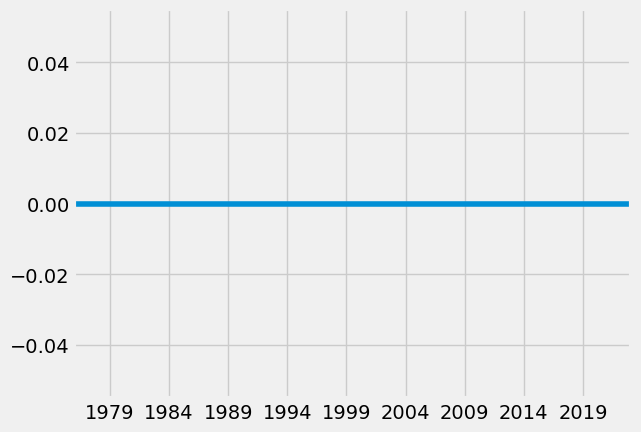

In [59]:
unemp_states['PRUR'].fillna(value=unemp_states.loc[unemp_states.index.year == 2020, 'PRUR'].mean(), inplace=True)
unemp_states.isna().sum(axis=1).plot()

**Change x-axis labels to full state names**

In [60]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
id_to_state

{'CAUR': 'California',
 'FLUR': 'Florida',
 'TXUR': 'Texas',
 'NYUR': 'New York',
 'PAUR': 'Pennsylvania',
 'OHUR': 'Ohio',
 'ALUR': 'Alabama',
 'MIUR': 'Michigan',
 'MNUR': 'Minnesota',
 'ILUR': 'Illinois',
 'NCUR': 'North Carolina',
 'NJUR': 'New Jersey',
 'MAUR': 'Massachusetts',
 'WIUR': 'Wisconsin',
 'WAUR': 'Washington',
 'KYUR': 'Kentucky',
 'TNUR': 'Tennessee',
 'GAUR': 'Georgia',
 'VAUR': 'Virginia',
 'COUR': 'Colorado',
 'MOUR': 'Missouri',
 'WVUR': 'West Virginia',
 'NMUR': 'New Mexico',
 'AKUR': 'Alaska',
 'ORUR': 'Oregon',
 'OKUR': 'Oklahoma',
 'AZUR': 'Arizona',
 'NVUR': 'Nevada',
 'SCUR': 'South Carolina',
 'UTUR': 'Utah',
 'IAUR': 'Iowa',
 'INUR': 'Indiana',
 'MDUR': 'Maryland',
 'LAUR': 'Louisiana',
 'ARUR': 'Arkansas',
 'NDUR': 'North Dakota',
 'NEUR': 'Nebraska',
 'KSUR': 'Kansas',
 'HIUR': 'Hawaii',
 'CTUR': 'Connecticut',
 'PRUR': 'Puerto Rico',
 'WYUR': 'Wyoming',
 'DCUR': 'the District of Columbia',
 'IDUR': 'Idaho',
 'MEUR': 'Maine',
 'MSUR': 'Mississippi',
 'SD

In [61]:
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]
unemp_states.head()

Alaska  Alabama  Arkansas  Arizona  California  Colorado   
1976-01-01     7.1      6.6       7.3     10.2         9.2       5.8  \
1976-02-01     7.1      6.6       7.3     10.2         9.2       5.7   
1976-03-01     7.0      6.6       7.3     10.1         9.1       5.7   
1976-04-01     6.9      6.5       7.2     10.0         9.1       5.6   
1976-05-01     6.9      6.4       7.1      9.8         9.0       5.6   

            Connecticut  the District of Columbia  Delaware  Florida  Georgia   
1976-01-01          9.8                       8.7       8.0      9.7      8.4  \
1976-02-01          9.8                       8.7       8.0      9.7      8.4   
1976-03-01          9.8                       8.6       8.0      9.6      8.4   
1976-04-01          9.6                       8.5       8.1      9.5      8.3   
1976-05-01          9.4                       8.4       8.3      9.3      8.1   

            Hawaii  Iowa  Idaho  Illinois  Indiana  Kansas  Kentucky   
1976-01-01     9.8   4.3    5.6       6.6      6.6     4.2       5.6  \
1976-02-01     9.8   4.3    5.6       6.6      6.6     4.2       5.6   
1976-03-01     9.8   4.3    5.6       6.6      6.5     4.2       5.6   
1976-04-01     9.7   4.2    5.6       6.6      6.3     4.2       5.6   
1976-05-01     9.4   4.1    5.6       6.6      6.0     4.2       5.5   

            Louisiana  Massachusetts  Maryland  Maine  Michigan  Minnesota   
1976-01-01        6.3           10.5       6.4    8.7       9.9        6.0  \
1976-02-01        6.3           10.5       6.4    8.7       9.9        6.0   
1976-03-01        6.3           10.5       6.4    8.6       9.9        5.9   
1976-04-01        6.4           10.3       6.4    8.6       9.8        5.8   
1976-05-01        6.5           10.1       6.5    8.5       9.6        5.7   

            Missouri  Mississippi  Montana  North Carolina  North Dakota   
1976-01-01       5.9          6.7      5.8             6.4           3.4  \
1976-02-01       5.9          6.7      5.8             6.4           3.4   
1976-03-01       5.9          6.6      5.8             6.4           3.4   
1976-04-01       6.0          6.4      5.8             6.3           3.5   
1976-05-01       6.0          6.3      5.8             6.1           3.6   

            Nebraska  New Hampshire  New Jersey  New Mexico  Nevada  New York   
1976-01-01       3.3            6.5        10.3         8.6     9.2      10.3  \
1976-02-01       3.3            6.5        10.3         8.7     9.2      10.3   
1976-03-01       3.3            6.5        10.3         8.7     9.2      10.2   
1976-04-01       3.2            6.5        10.3         8.6     9.0      10.2   
1976-05-01       3.1            6.5        10.3         8.6     8.9      10.1   

            Ohio  Oklahoma  Oregon  Pennsylvania  Puerto Rico  Rhode Island   
1976-01-01   8.1       5.8     9.5           8.0         19.6           7.8  \
1976-02-01   8.1       5.8     9.5           8.1         19.5           7.8   
1976-03-01   8.1       5.8     9.4           8.1         19.3           7.7   
1976-04-01   8.0       5.8     9.2           8.1         19.0           7.7   
1976-05-01   7.8       5.7     9.1           8.1         18.9           7.7   

            South Carolina  South Dakota  Tennessee  Texas  Utah  Virginia   
1976-01-01             7.4           3.3        6.0    5.8   5.8       6.1  \
1976-02-01             7.4           3.3        6.0    5.8   5.9       6.1   
1976-03-01             7.3           3.2        6.0    5.9   5.8       6.1   
1976-04-01             7.2           3.1        6.0    5.9   5.8       6.0   
1976-05-01             7.0           3.1        5.9    5.9   5.7       5.9   

            Vermont  Washington  Wisconsin  West Virginia  Wyoming  
1976-01-01      8.6         8.5        5.8            7.5      4.1  
1976-02-01      8.6         8.5        5.8            7.5      4.1  
1976-03-01      8.6         8.4        5.7            7.5      4.1  
1976-04-01      8.6       

**Plot the Dataframe**

In [62]:
# Plot States Unemployment Rate
px.line(unemp_states)

**Plot April 2020 Unemployment Rate per State**

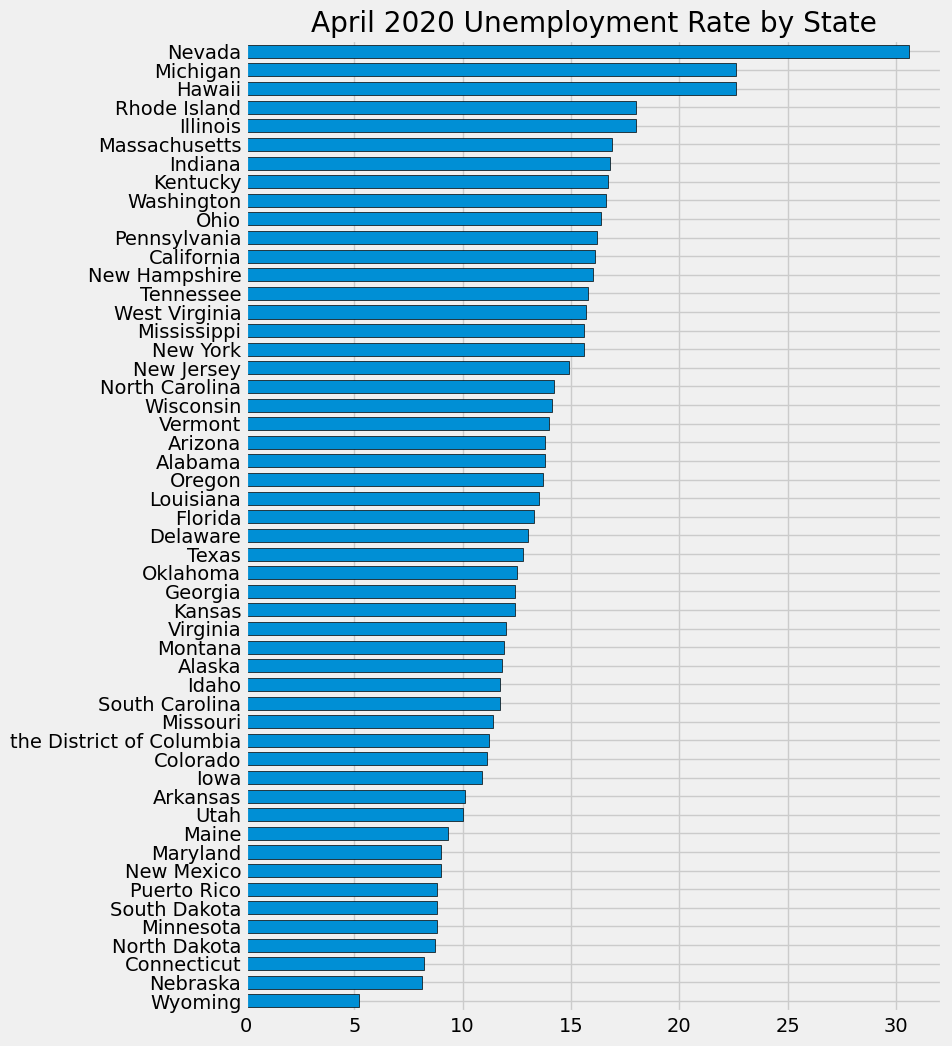

In [63]:
ax = unemp_states.loc[unemp_states.index == '2020-04-01'].T.sort_values(by='2020-04-01').plot(kind='barh', figsize=(8,12), width=.7, edgecolor='black', title=('April 2020 Unemployment Rate by State'))
ax.legend().remove()
plt.show()

### Pull Participation Rate
This is an indicator of people participating in the job market.

In [64]:
part_df = fred.search(text='participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == \'Seasonally Adjusted\' and units == \'Percent\'')

part_df

id realtime_start realtime_end   
series id                                                      
CIVPART                  CIVPART     2023-04-09   2023-04-09  \
LNS11300060          LNS11300060     2023-04-09   2023-04-09   
LNS11300002          LNS11300002     2023-04-09   2023-04-09   
LNS11300001          LNS11300001     2023-04-09   2023-04-09   
LNS11324230          LNS11324230     2023-04-09   2023-04-09   
LNS11300012          LNS11300012     2023-04-09   2023-04-09   
LNS11300036          LNS11300036     2023-04-09   2023-04-09   
LNS11300006          LNS11300006     2023-04-09   2023-04-09   
LRAC25MAUSM156S  LRAC25MAUSM156S     2023-04-09   2023-04-09   
LNS11327662          LNS11327662     2023-04-09   2023-04-09   
LNS11300028          LNS11300028     2023-04-09   2023-04-09   
LBSSA06                  LBSSA06     2023-04-09   2023-04-09   
LNS11300031          LNS11300031     2023-04-09   2023-04-09   
LBSSA55                  LBSSA55     2023-04-09   2023-04-09   
LNS11327660          LNS11327660     2023-04-09   2023-04-09   
LBSSA27                  LBSSA27     2023-04-09   2023-04-09   
LNS11300032          LNS11300032     2023-04-09   2023-04-09   
LNS11300003          LNS11300003     2023-04-09   2023-04-09   
LRAC25FEUSM156S  LRAC25FEUSM156S     2023-04-09   2023-04-09   
LBSSA21                  LBSSA21     2023-04-09   2023-04-09   
LNS11300009          LNS11300009     2023-04-09   2023-04-09   
LBSSA01                  LBSSA01     2023-04-09   2023-04-09   
LBSSA12                  LBSSA12     2023-04-09   2023-04-09   
LBSSA48                  LBSSA48     2023-04-09   2023-04-09   
LBSSA39                  LBSSA39     2023-04-09   2023-04-09   
LBSSA26                  LBSSA26     2023-04-09   2023-04-09   
LBSSA23                  LBSSA23     2023-04-09   2023-04-09   
LNS11300025          LNS11300025     2023-04-09   2023-04-09   
LBSSA08                  LBSSA08     2023-04-09   2023-04-09   
LBSSA36                  LBSSA36     2023-04-09   2023-04-09   
LNS11300026          LNS11300026     2023-04-09   2023-04-09   
LBSSA25                  LBSSA25     2023-04-09   2023-04-09   
LNS11300029          LNS11300029     2023-04-09   2023-04-09   
LNS11327659          LNS11327659     2023-04-09   2023-04-09   
LBSSA13                  LBSSA13     2023-04-09   2023-04-09   
LBSSA54                  LBSSA54     2023-04-09   2023-04-09   
LBSSA17                  LBSSA17     2023-04-09   2023-04-09   
LRAC64TTUSM156S  LRAC64TTUSM156S     2023-04-09   2023-04-09   
LBSSA47                  LBSSA47     2023-04-09   2023-04-09   
LBSSA37                  LBSSA37     2023-04-09   2023-04-09   
LBSSA22                  LBSSA22     2023-04-09   2023-04-09   
LBSSA28                  LBSSA28     2023-04-09   2023-04-09   
LBSSA49                  LBSSA49     2023-04-09   2023-04-09   
LBSSA40                  LBSSA40     2023-04-09   2023-04-09   
LBSSA29                  LBSSA29     2023-04-09   2023-04-09   
LBSSA42                  LBSSA42     2023-04-09   2023-04-09   
LBSSA18                  LBSSA18     2023-04-09   2023-04-09   
LBSSA15                  LBSSA15     2023-04-09   2023-04-09   
LRAC55TTUSM156S  LRAC55TTUSM156S     2023-04-09   2023-04-09   
LBSSA02                  LBSSA02     2023-04-09   2023-04-09   
LBSSA19                  LBSSA19     2023-04-09   2023-04-09   
LBSSA24                  LBSSA24     2023-04-09   2023-04-09   
LBSSA35                  LBSSA35     2023-04-09   2023-04-09   
LNS11327689          LNS11327689     2023-04-09   2023-04-09   
LBSSA51                  LBSSA51     2023-04-09   2023-04-09   
LBSSA45                  LBSSA45     2023-04-09   2023-04-09   
LBSSA05                  LBSSA05     2023-04-09   2023-04-09   
LBSSA53                  LBSSA53     2023-04-09   2023-04-09   
LBSSA41                  LBSSA41     2023-04-09   2023-04-09   
LBSSA04                  LBSSA04     2023-04-09   2023-04-09   
LBSSA31                  LBSSA31     2023-04-09   2023-04-09  

**Restrict the dataset to participation data in each state**

In [65]:
part_df.drop(index=part_df.loc[part_df.index.str.len() > 7].index, inplace=True)
part_df

id realtime_start realtime_end   
series id                                        
CIVPART    CIVPART     2023-04-09   2023-04-09  \
LBSSA06    LBSSA06     2023-04-09   2023-04-09   
LBSSA55    LBSSA55     2023-04-09   2023-04-09   
LBSSA27    LBSSA27     2023-04-09   2023-04-09   
LBSSA21    LBSSA21     2023-04-09   2023-04-09   
LBSSA01    LBSSA01     2023-04-09   2023-04-09   
LBSSA12    LBSSA12     2023-04-09   2023-04-09   
LBSSA48    LBSSA48     2023-04-09   2023-04-09   
LBSSA39    LBSSA39     2023-04-09   2023-04-09   
LBSSA26    LBSSA26     2023-04-09   2023-04-09   
LBSSA23    LBSSA23     2023-04-09   2023-04-09   
LBSSA08    LBSSA08     2023-04-09   2023-04-09   
LBSSA36    LBSSA36     2023-04-09   2023-04-09   
LBSSA25    LBSSA25     2023-04-09   2023-04-09   
LBSSA13    LBSSA13     2023-04-09   2023-04-09   
LBSSA54    LBSSA54     2023-04-09   2023-04-09   
LBSSA17    LBSSA17     2023-04-09   2023-04-09   
LBSSA47    LBSSA47     2023-04-09   2023-04-09   
LBSSA37    LBSSA37     2023-04-09   2023-04-09   
LBSSA22    LBSSA22     2023-04-09   2023-04-09   
LBSSA28    LBSSA28     2023-04-09   2023-04-09   
LBSSA49    LBSSA49     2023-04-09   2023-04-09   
LBSSA40    LBSSA40     2023-04-09   2023-04-09   
LBSSA29    LBSSA29     2023-04-09   2023-04-09   
LBSSA42    LBSSA42     2023-04-09   2023-04-09   
LBSSA18    LBSSA18     2023-04-09   2023-04-09   
LBSSA15    LBSSA15     2023-04-09   2023-04-09   
LBSSA02    LBSSA02     2023-04-09   2023-04-09   
LBSSA19    LBSSA19     2023-04-09   2023-04-09   
LBSSA24    LBSSA24     2023-04-09   2023-04-09   
LBSSA35    LBSSA35     2023-04-09   2023-04-09   
LBSSA51    LBSSA51     2023-04-09   2023-04-09   
LBSSA45    LBSSA45     2023-04-09   2023-04-09   
LBSSA05    LBSSA05     2023-04-09   2023-04-09   
LBSSA53    LBSSA53     2023-04-09   2023-04-09   
LBSSA41    LBSSA41     2023-04-09   2023-04-09   
LBSSA04    LBSSA04     2023-04-09   2023-04-09   
LBSSA31    LBSSA31     2023-04-09   2023-04-09   
LBSSA33    LBSSA33     2023-04-09   2023-04-09   
LBSSA32    LBSSA32     2023-04-09   2023-04-09   
LBSSA16    LBSSA16     2023-04-09   2023-04-09   
LBSSA20    LBSSA20     2023-04-09   2023-04-09   
LBSSA38    LBSSA38     2023-04-09   2023-04-09   
LBSSA34    LBSSA34     2023-04-09   2023-04-09   
LBSSA09    LBSSA09     2023-04-09   2023-04-09   
LBSSA30    LBSSA30     2023-04-09   2023-04-09   
LBSSA46    LBSSA46     2023-04-09   2023-04-09   
LBSSA50    LBSSA50     2023-04-09   2023-04-09   
LBSSA56    LBSSA56     2023-04-09   2023-04-09   
LBSSA10    LBSSA10     2023-04-09   2023-04-09   
LBSSA44    LBSSA44     2023-04-09   2023-04-09   
LBSSA11    LBSSA11     2023-04-09   2023-04-09   

                                                       title   
series id                                                      
CIVPART                       Labor Force Participation Rate  \
LBSSA06        Labor Force Participation Rate for California   
LBSSA55         Labor Force Participation Rate for Wisconsin   
LBSSA27         Labor Force Participation Rate for Minnesota   
LBSSA21          Labor Force Participation Rate for Kentucky   
LBSSA01           Labor Force Participation Rate for Alabama   
LBSSA12           Labor Force Participation Rate for Florida   
LBSSA48             Labor Force Participation Rate for Texas   
LBSSA39              Labor Force Participation Rate for Ohio   
LBSSA26          Labor Force Participation Rate for Michigan   
LBSSA23             Labor Force Participation Rate for Maine   
LBSSA08          Labor Force Participation Rate for Colorado   
LBSSA36          Labor Force Participation Rate for New York   
LBSSA25     Labor Force Participation Rate for Massachusetts   
LBSSA13           Labor Force Participation Rate for Georgia   
LBSSA54     Labor Force Participation Rate for West Virginia   
LBSSA17          Labor Force Participation Rate for Illinois   
LBSSA47         Labor Force Participation Rate for Tennessee   
LBSSA37    Labor Force Participatio

In [66]:
series_ids = list(part_df.index)

all_part_series = list()
for id in series_ids:
    result = fred.get_series(series_id=id)
    result = result.to_frame(name=id)
    all_part_series.append(result)

part_states = pd.concat(all_part_series, axis=1).sort_index(axis=1)
part_states

CIVPART  LBSSA01  LBSSA02  LBSSA04  LBSSA05  LBSSA06  LBSSA08   
1948-01-01     58.6      NaN      NaN      NaN      NaN      NaN      NaN  \
1948-02-01     58.9      NaN      NaN      NaN      NaN      NaN      NaN   
1948-03-01     58.5      NaN      NaN      NaN      NaN      NaN      NaN   
1948-04-01     59.0      NaN      NaN      NaN      NaN      NaN      NaN   
1948-05-01     58.3      NaN      NaN      NaN      NaN      NaN      NaN   
1948-06-01     59.2      NaN      NaN      NaN      NaN      NaN      NaN   
1948-07-01     59.3      NaN      NaN      NaN      NaN      NaN      NaN   
1948-08-01     58.9      NaN      NaN      NaN      NaN      NaN      NaN   
1948-09-01     58.9      NaN      NaN      NaN      NaN      NaN      NaN   
1948-10-01     58.7      NaN      NaN      NaN      NaN      NaN      NaN   
1948-11-01     58.7      NaN      NaN      NaN      NaN      NaN      NaN   
1948-12-01     59.1      NaN      NaN      NaN      NaN      NaN      NaN   
1949-01-01     58.7      NaN      NaN      NaN      NaN      NaN      NaN   
1949-02-01     59.0      NaN      NaN      NaN      NaN      NaN      NaN   
1949-03-01     58.9      NaN      NaN      NaN      NaN      NaN      NaN   
1949-04-01     58.8      NaN      NaN      NaN      NaN      NaN      NaN   
1949-05-01     59.0      NaN      NaN      NaN      NaN      NaN      NaN   
1949-06-01     58.6      NaN      NaN      NaN      NaN      NaN      NaN   
1949-07-01     58.9      NaN      NaN      NaN      NaN      NaN      NaN   
1949-08-01     59.2      NaN      NaN      NaN      NaN      NaN      NaN   
1949-09-01     59.1      NaN      NaN      NaN      NaN      NaN      NaN   
1949-10-01     59.6      NaN      NaN      NaN      NaN      NaN      NaN   
1949-11-01     59.4      NaN      NaN      NaN      NaN      NaN      NaN   
1949-12-01     59.2      NaN      NaN      NaN      NaN      NaN      NaN   
1950-01-01     58.9      NaN      NaN      NaN      NaN      NaN      NaN   
1950-02-01     58.9      NaN      NaN      NaN      NaN      NaN      NaN   
1950-03-01     58.8      NaN      NaN      NaN      NaN      NaN      NaN   
1950-04-01     59.2      NaN      NaN      NaN      NaN      NaN      NaN   
1950-05-01     59.1      NaN      NaN      NaN      NaN      NaN      NaN   
1950-06-01     59.4      NaN      NaN      NaN      NaN      NaN      NaN   
1950-07-01     59.1      NaN      NaN      NaN      NaN      NaN      NaN   
1950-08-01     59.5      NaN      NaN      NaN      NaN      NaN      NaN   
1950-09-01     59.2      NaN      NaN      NaN      NaN      NaN      NaN   
1950-10-01     59.4      NaN      NaN      NaN      NaN      NaN      NaN   
1950-11-01     59.3      NaN      NaN      NaN      NaN      NaN      NaN   
1950-12-01     59.2      NaN      NaN      NaN      NaN      NaN      NaN   
1951-01-01     59.1      NaN      NaN      NaN      NaN      NaN      NaN   
1951-02-01     59.1      NaN      NaN      NaN      NaN      NaN      NaN   
1951-03-01     59.8      NaN      NaN      NaN      NaN      NaN      NaN   
1951-04-01     59.1      NaN      NaN      NaN      NaN      NaN      NaN   
1951-05-01     59.4      NaN      NaN      NaN      NaN      NaN      NaN   
1951-06-01     59.0      NaN      NaN      NaN      NaN      NaN      NaN   
1951-07-01     59.4      NaN      NaN      NaN      NaN      NaN      NaN   
1951-08-01     59.2      NaN      NaN      NaN      NaN      NaN      NaN   
1951-09-01     59.1      NaN      NaN      NaN      NaN      NaN      NaN   
1951-10-01     59.4      NaN      NaN      NaN      NaN      NaN      NaN   
1951-11-01     59.2      NaN      NaN      NaN      NaN      NaN      NaN   
1951-12-01     59.6      NaN      NaN      NaN      NaN      NaN      NaN   
1952-01-01     59.5      NaN      NaN      NaN      NaN      NaN      NaN   
1952-02-01     59.5      NaN      NaN      NaN      NaN      NaN      NaN   
1952-03-01     58.9      NaN      NaN      NaN      NaN      NaN      NaN   
1952-04-

In [67]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()
part_id_to_state

{'CIVPART': 'Labor Force Participation Rate',
 'LBSSA06': 'California',
 'LBSSA55': 'Wisconsin',
 'LBSSA27': 'Minnesota',
 'LBSSA21': 'Kentucky',
 'LBSSA01': 'Alabama',
 'LBSSA12': 'Florida',
 'LBSSA48': 'Texas',
 'LBSSA39': 'Ohio',
 'LBSSA26': 'Michigan',
 'LBSSA23': 'Maine',
 'LBSSA08': 'Colorado',
 'LBSSA36': 'New York',
 'LBSSA25': 'Massachusetts',
 'LBSSA13': 'Georgia',
 'LBSSA54': 'West Virginia',
 'LBSSA17': 'Illinois',
 'LBSSA47': 'Tennessee',
 'LBSSA37': 'North Carolina',
 'LBSSA22': 'Louisiana',
 'LBSSA28': 'Mississippi',
 'LBSSA49': 'Utah',
 'LBSSA40': 'Oklahoma',
 'LBSSA29': 'Missouri',
 'LBSSA42': 'Pennsylvania',
 'LBSSA18': 'Indiana',
 'LBSSA15': 'Hawaii',
 'LBSSA02': 'Alaska',
 'LBSSA19': 'Iowa',
 'LBSSA24': 'Maryland',
 'LBSSA35': 'New Mexico',
 'LBSSA51': 'Virginia',
 'LBSSA45': 'South Carolina',
 'LBSSA05': 'Arkansas',
 'LBSSA53': 'Washington',
 'LBSSA41': 'Oregon',
 'LBSSA04': 'Arizona',
 'LBSSA31': 'Nebraska',
 'LBSSA33': 'New Hampshire',
 'LBSSA32': 'Nevada',
 'LBS

In [68]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]
part_states.head()

Labor Force Participation Rate  Alabama  Alaska  Arizona   
1948-01-01                            58.6      NaN     NaN      NaN  \
1948-02-01                            58.9      NaN     NaN      NaN   
1948-03-01                            58.5      NaN     NaN      NaN   
1948-04-01                            59.0      NaN     NaN      NaN   
1948-05-01                            58.3      NaN     NaN      NaN   

            Arkansas  California  Colorado  Connecticut  Delaware   
1948-01-01       NaN         NaN       NaN          NaN       NaN  \
1948-02-01       NaN         NaN       NaN          NaN       NaN   
1948-03-01       NaN         NaN       NaN          NaN       NaN   
1948-04-01       NaN         NaN       NaN          NaN       NaN   
1948-05-01       NaN         NaN       NaN          NaN       NaN   

            District Of Columbia  Florida  Georgia  Hawaii  Idaho  Illinois   
1948-01-01                   NaN      NaN      NaN     NaN    NaN       NaN  \
1948-02-01                   NaN      NaN      NaN     NaN    NaN       NaN   
1948-03-01                   NaN      NaN      NaN     NaN    NaN       NaN   
1948-04-01                   NaN      NaN      NaN     NaN    NaN       NaN   
1948-05-01                   NaN      NaN      NaN     NaN    NaN       NaN   

            Indiana  Iowa  Kansas  Kentucky  Louisiana  Maine  Maryland   
1948-01-01      NaN   NaN     NaN       NaN        NaN    NaN       NaN  \
1948-02-01      NaN   NaN     NaN       NaN        NaN    NaN       NaN   
1948-03-01      NaN   NaN     NaN       NaN        NaN    NaN       NaN   
1948-04-01      NaN   NaN     NaN       NaN        NaN    NaN       NaN   
1948-05-01      NaN   NaN     NaN       NaN        NaN    NaN       NaN   

            Massachusetts  Michigan  Minnesota  Mississippi  Missouri   
1948-01-01            NaN       NaN        NaN          NaN       NaN  \
1948-02-01            NaN       NaN        NaN          NaN       NaN   
1948-03-01            NaN       NaN        NaN          NaN       NaN   
1948-04-01            NaN       NaN        NaN          NaN       NaN   
1948-05-01            NaN       NaN        NaN          NaN       NaN   

            Montana  Nebraska  Nevada  New Hampshire  New Jersey  New Mexico   
1948-01-01      NaN       NaN     NaN            NaN         NaN         NaN  \
1948-02-01      NaN       NaN     NaN            NaN         NaN         NaN   
1948-03-01      NaN       NaN     NaN            NaN         NaN         NaN   
1948-04-01      NaN       NaN     NaN            NaN         NaN         NaN   
1948-05-01      NaN       NaN     NaN            NaN         NaN         NaN   

            New York  North Carolina  North Dakota  Ohio  Oklahoma  Oregon   
1948-01-01       NaN             NaN           NaN   NaN       NaN     NaN  \
1948-02-01       NaN             NaN           NaN   NaN       NaN     NaN   
1948-03-01       NaN             NaN           NaN   NaN       NaN     NaN   
1948-04-01       NaN             NaN           NaN   NaN       NaN     NaN   
1948-05-01       NaN             NaN           NaN   NaN       NaN     NaN   

            Pennsylvania  Rhode Island  South Carolina  South Dakota   
1948-01-01           NaN           NaN             NaN           NaN  \
1948-02-01           NaN           NaN             NaN           NaN   
1948-03-01           NaN           NaN             NaN           NaN   
1948-04-01           NaN           NaN             NaN           NaN   
1948-05-01           NaN           NaN             NaN           NaN   

            Tennessee  Texas  Utah  Vermont  Virginia  Washington   
1948-01-01        NaN    NaN   NaN      NaN       NaN         NaN  \
1948-02-01        NaN    NaN   NaN      NaN       NaN         NaN   
1948-03-01        NaN    NaN   NaN      NaN       NaN         NaN   
1948-04-01        NaN    NaN   NaN      NaN       NaN         NaN   
1948-05-01        NaN    NaN   NaN      NaN       NaN         NaN   

 

**Plot Unemployment vs Participation Rate**

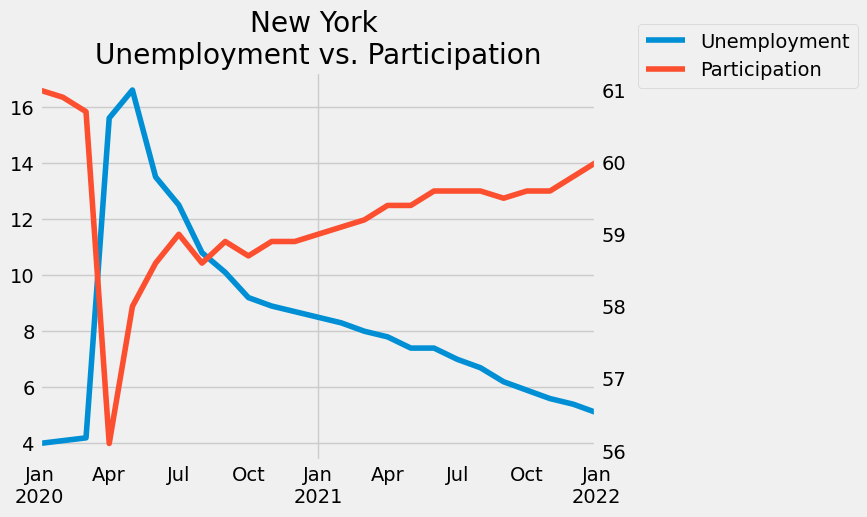

In [78]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemp_states.query('index >= 2020 and index <= 2022')['New York'].plot(ax=ax, label='Unemployment', color=color_pal[0])
part_states.query('index >= 2020 and index <= 2022')['New York'].plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title('New York \nUnemployment vs. Participation')
fig.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [94]:
unemp_states.rename(columns={'the District of Columbia': 'District Of Columbia'}, inplace=True)

In [96]:
part_states.columns

Index(['Labor Force Participation Rate', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

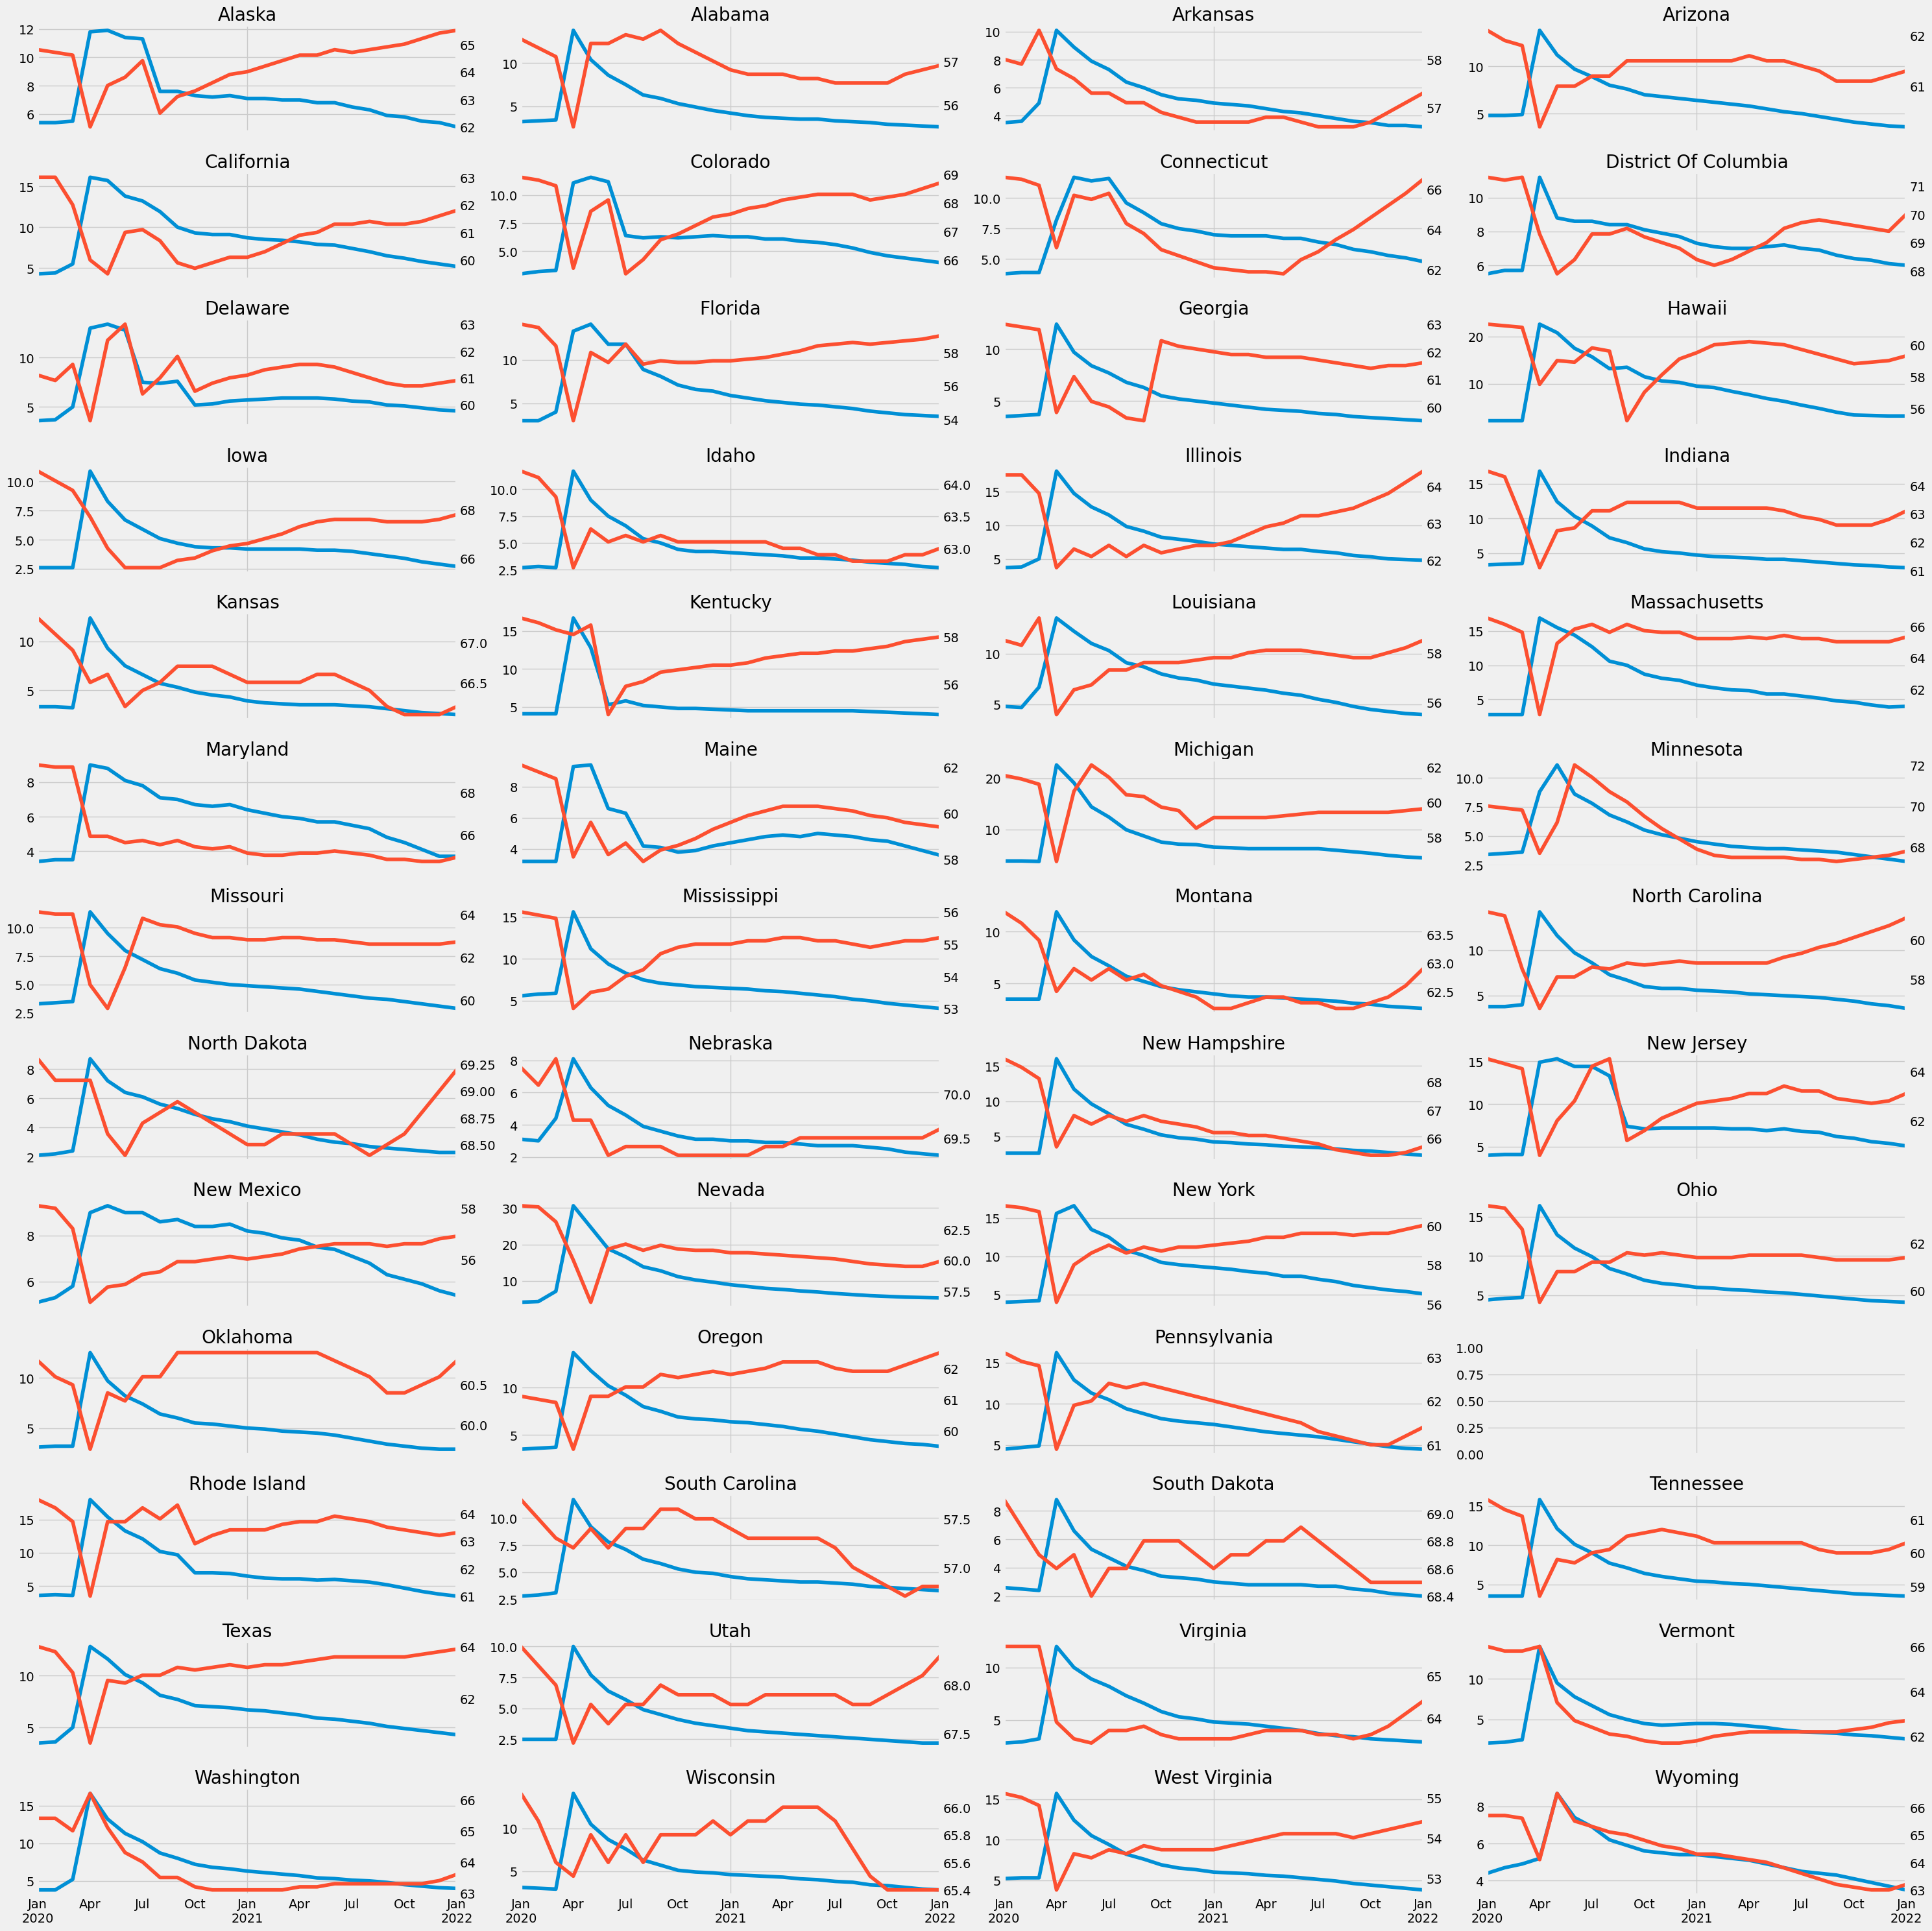

In [101]:
fig, axs = plt.subplots(13, 4, figsize=(30,30), sharex=True)
axs = axs.flatten()

states = unemp_states.columns
num_states = list(range(len(states)))

for num, state in zip(num_states, states):
    if state == 'Puerto Rico':
        continue
    ax2 = axs[num].twinx()
    unemp_states.query('index >= 2020 and index <= 2022')[state].plot(ax=axs[num], label='Unemployment', color=color_pal[0])
    part_states.query('index >= 2020 and index <= 2022')[state].plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[num].set_title(state)

# axs.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()